In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
logins = pd.read_json('./Data/logins.json')
print(len(logins))
logins.head()

93142


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [165]:
print(logins['login_time'].max())

1970-04-13 18:57:38


In [166]:
# Set the index to the login_time
logins.set_index('login_time', inplace=True)
logins.index = pd.to_datetime(logins.index)

# Add a column for count
logins['count'] = 1

logins.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [167]:
# Resample the data to 15 minute intervals
logins_resampled = logins.resample('15T').sum()

logins_resampled.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [168]:
len(logins_resampled)

9788

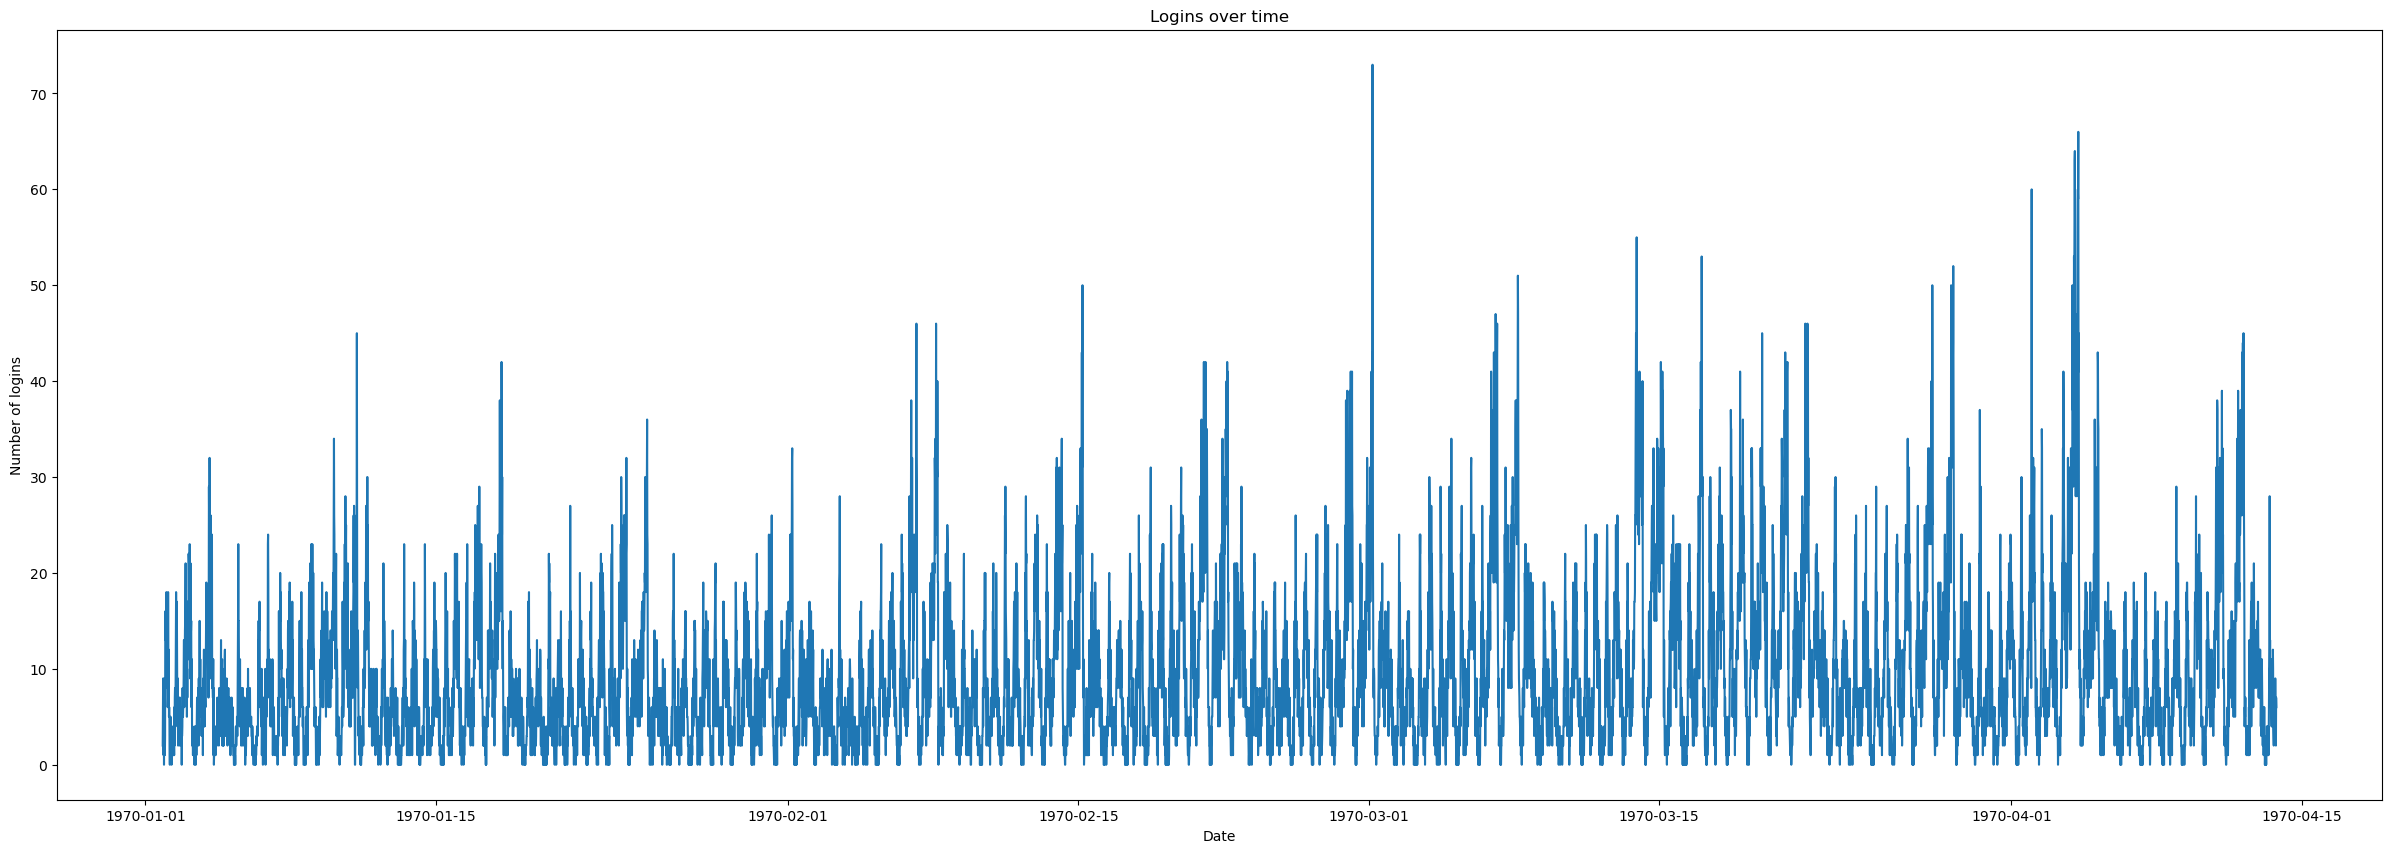

In [169]:
# Plot the data
plt.figure(figsize=(30, 10))
plt.plot(logins_resampled['count'])
plt.title('Logins over time')
plt.xlabel('Date')
plt.ylabel('Number of logins')
plt.show()

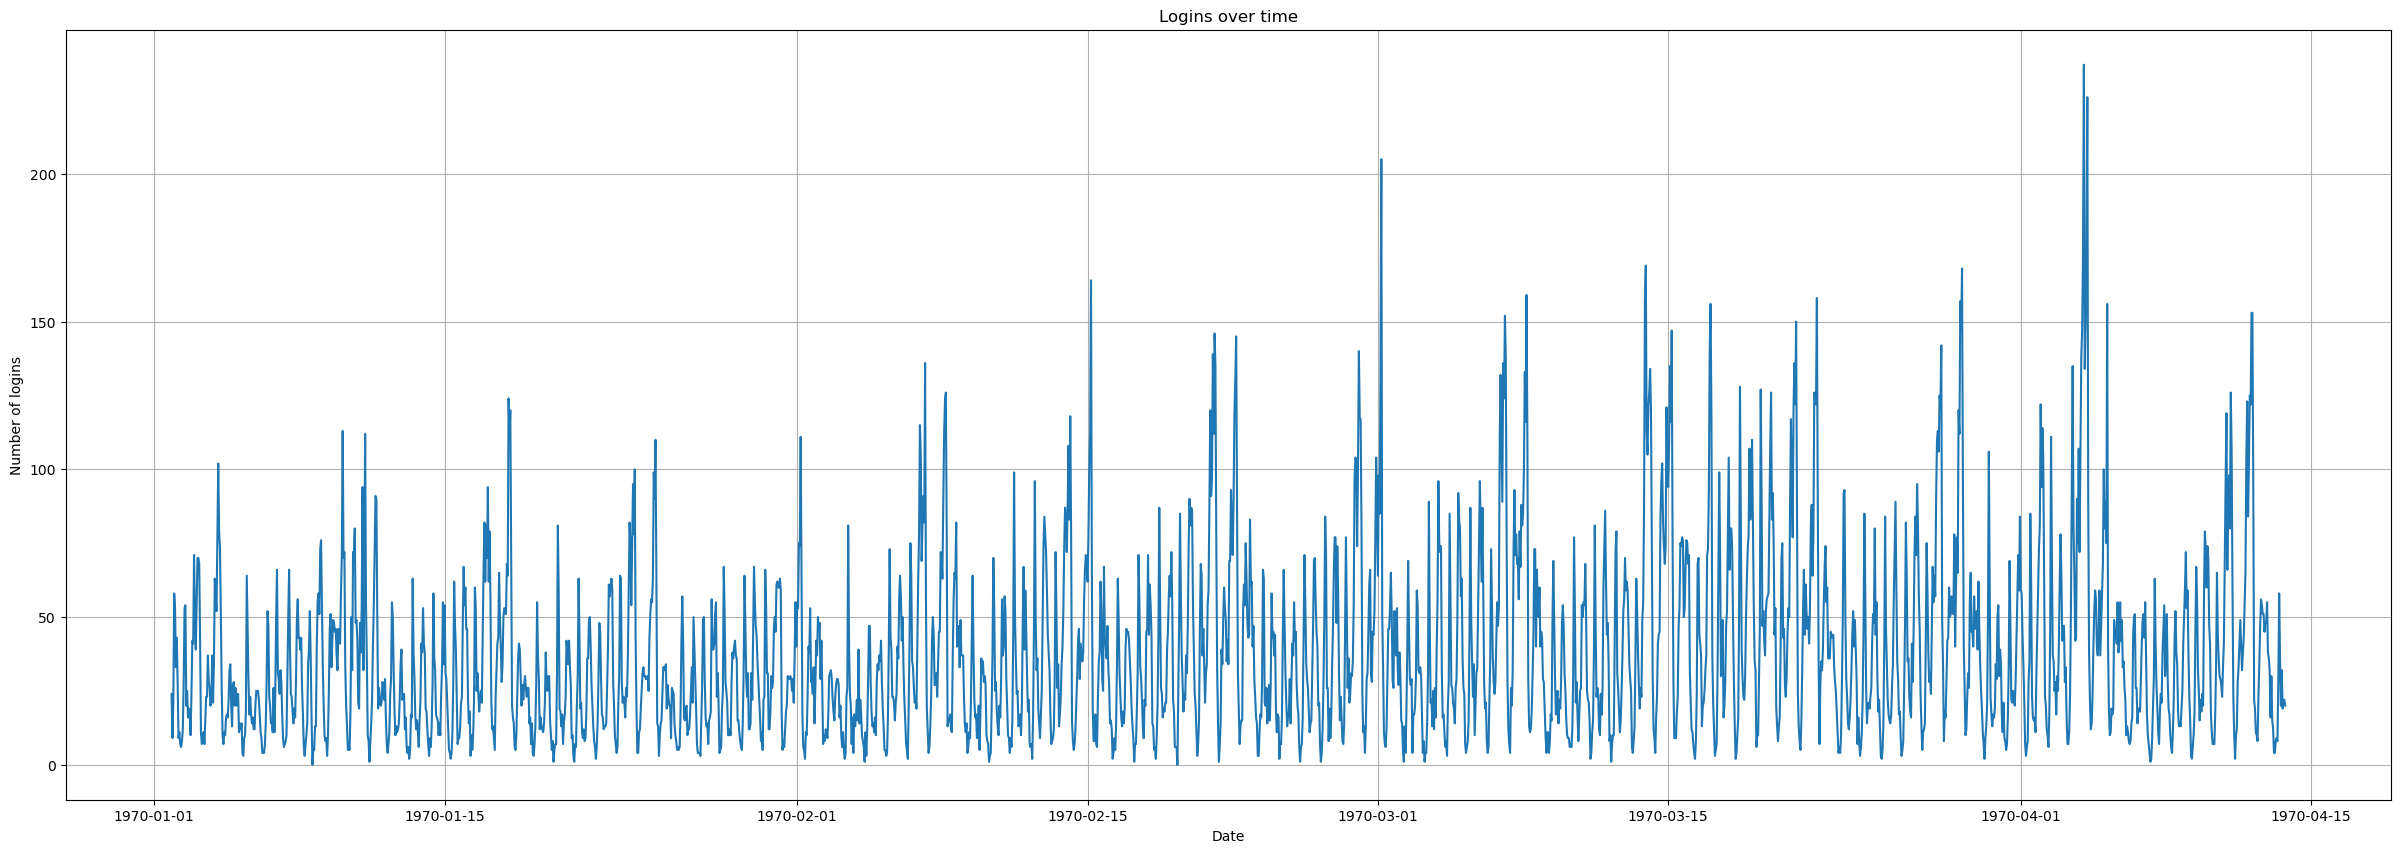

In [170]:
# Resample the data to a larger time interval (e.g., hourly)
logins_resampled_hourly = logins_resampled.resample('H').sum()

# Plot the data
plt.figure(figsize=(30, 10))
plt.plot(logins_resampled_hourly['count'])
plt.title('Logins over time')
plt.xlabel('Date')
plt.ylabel('Number of logins')
plt.grid(True)
plt.show()

In [171]:
# Split the data based on the month
logins_resampled['month'] = logins_resampled.index.month
logins_resampled['day'] = logins_resampled.index.day
logins_resampled['hour'] = logins_resampled.index.hour
logins_resampled['minute'] = logins_resampled.index.minute

In [172]:
def week_of_month(dt):
    """ Get the week of the month for the specified date.
    """
    
    
    return int(np.ceil(dt/7.0))

# Apply the function to a date column in a DataFrame
logins_resampled['week_of_month'] = logins_resampled['day'].apply(week_of_month)

In [173]:
logins_resampled

,count,month,day,hour,minute,week_of_month
login_time,,,,,,
1970-01-01 20:00:00,2,1,1,20,0,1
1970-01-01 20:15:00,6,1,1,20,15,1
1970-01-01 20:30:00,9,1,1,20,30,1
1970-01-01 20:45:00,7,1,1,20,45,1
1970-01-01 21:00:00,1,1,1,21,0,1
...,...,...,...,...,...,...
1970-04-13 17:45:00,5,4,13,17,45,2
1970-04-13 18:00:00,5,4,13,18,0,2
1970-04-13 18:15:00,2,4,13,18,15,2


<Axes: xlabel='month'>

<Figure size 3000x1000 with 0 Axes>

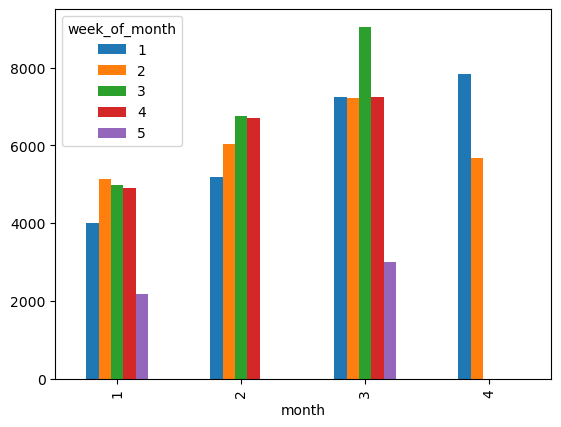

In [174]:
# Plot the data for month == 1 and week == 1 - 4
plt.figure(figsize=(30, 10))
logins_resampled.groupby(['month', 'week_of_month'])['count'].sum().unstack().plot(kind='bar')


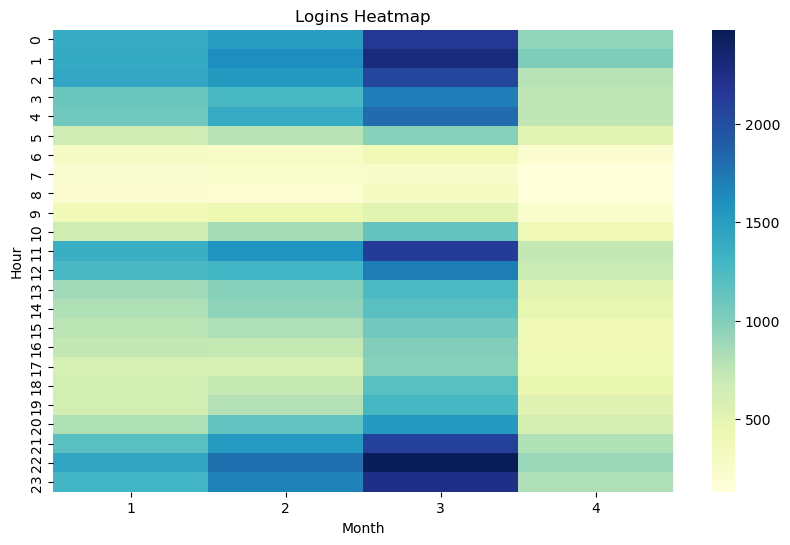

In [175]:
# reset the index
df = logins_resampled.reset_index()

# Create hr_min column
df['hr_min'] = df['hour'] + df['minute']/60

# Heatmap
heatmap_data = df.pivot_table(index='hour', columns='month', values='count', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Logins Heatmap')
plt.xlabel('Month')
plt.ylabel('Hour')

plt.show()

<font size="4">
We can see an initial trend of increased logins between the hours of 9pm and 2am, as well as around 11am. The number of logins is lowest between 6am and 9am.

The cumulative number of logins increases steadily from January to March. The decline in April is likely due to the fact that the data only goes up to April 13th.
</font>


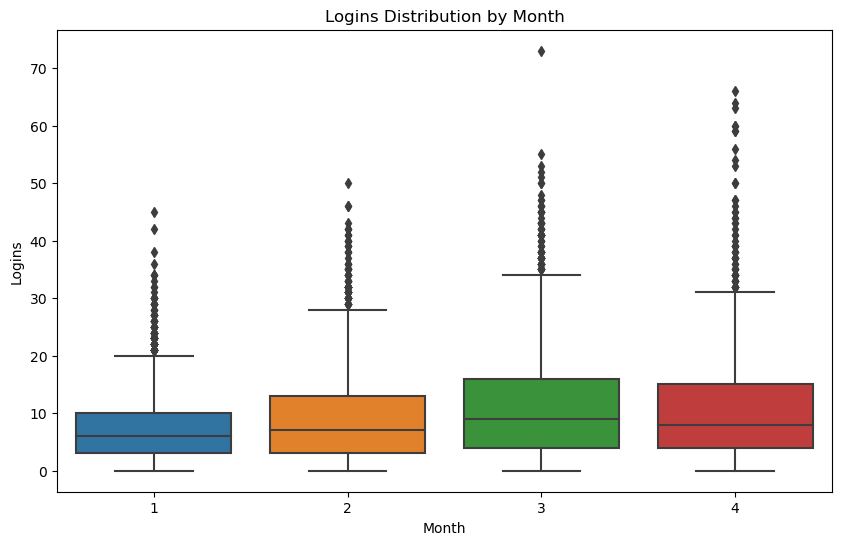

In [177]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='count', data=df)
plt.title('Logins Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Logins')
plt.show()

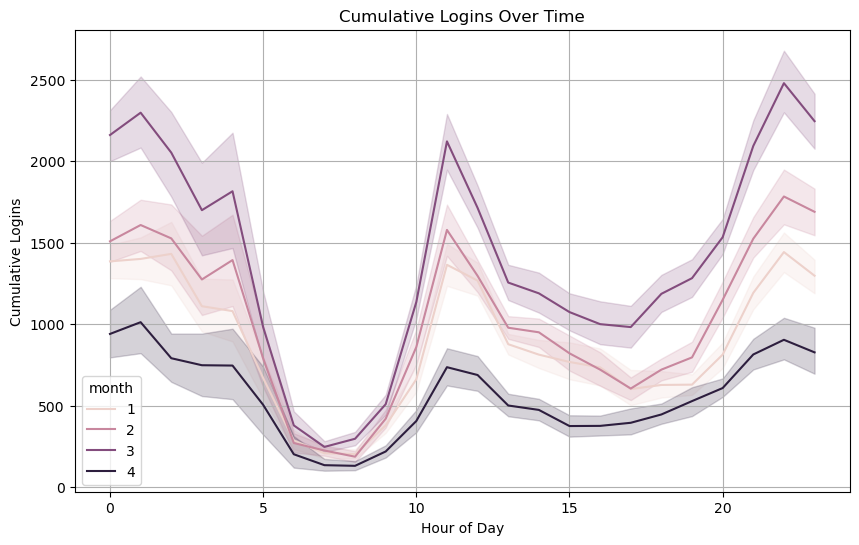

In [181]:
# Stacked Area Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='count', hue='month', data=df, estimator='sum')
plt.title('Cumulative Logins Over Time')
plt.xlabel('Hour of Day')
plt.ylabel('Cumulative Logins')
plt.grid(True)
plt.show()

<font size="4">
A stacked area chart further illustrates the trend of increased logins between the hours of 9pm and 2am, as well as around 11am, with the number of logins lowest between 6am and 9am.
</font>

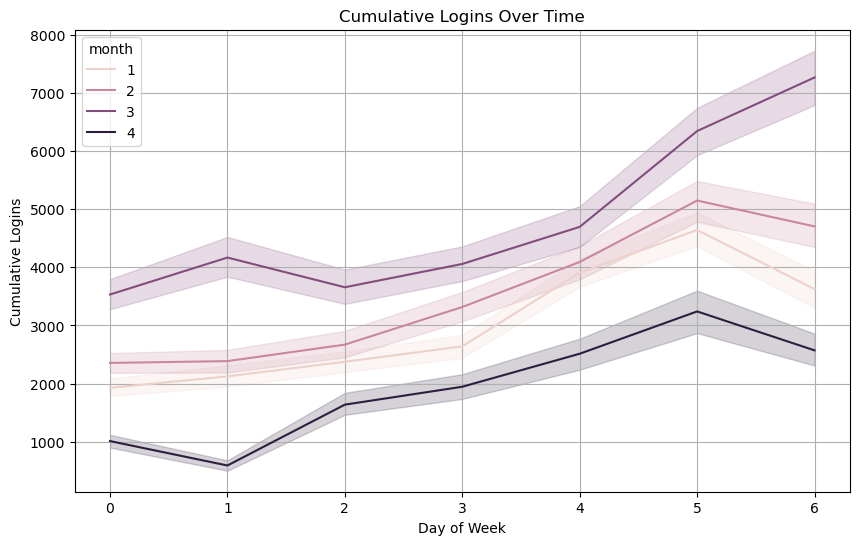

In [178]:
# Create new columns for day of week
df['day_of_week'] = df['login_time'].dt.dayofweek

# Stacked Area Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='count', hue='month', data=df, estimator='sum')
plt.title('Cumulative Logins Over Time')
plt.xlabel('Day of Week')
plt.ylabel('Cumulative Logins')
plt.grid(True)

plt.show()

<font size="4">
Breaking down the data by day of the week, we can see that the number of logins is highest on the weekends, with a peak on Saturday. The number of logins is lowest on Monday and Tuesday.
</font>

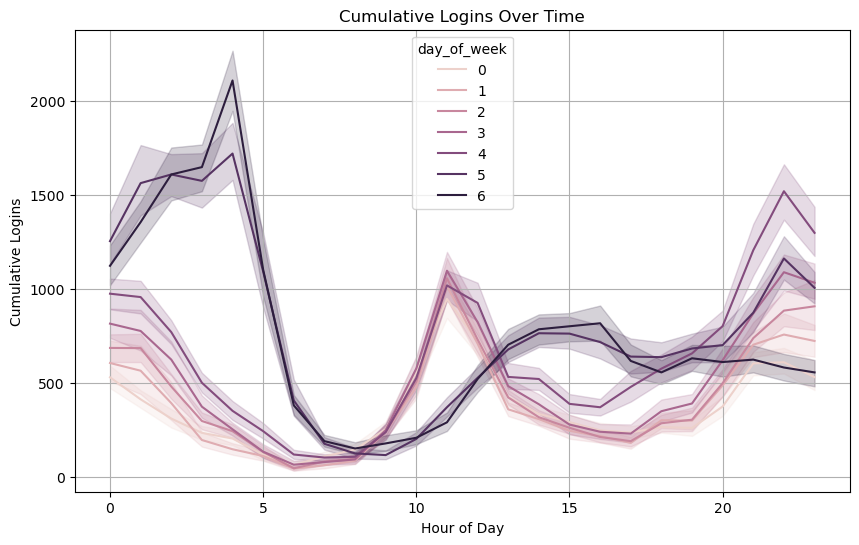

In [179]:
# Display hourly logins per day of the week
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='count', hue='day_of_week', data=df, estimator='sum')
plt.title('Cumulative Logins Over Time')
plt.xlabel('Hour of Day')
plt.ylabel('Cumulative Logins')
plt.grid(True)

plt.show()

<font size="4">
We can see a trend in between the weekdays, 0-5, and the weekends, 5-6. <br>

On the weekdays, there is an initial peak in logins around 11am, followed by a steady increase in logins from 9pm to 2am.

On the weekends, there is an additional peak in logins around 4am.
</font>

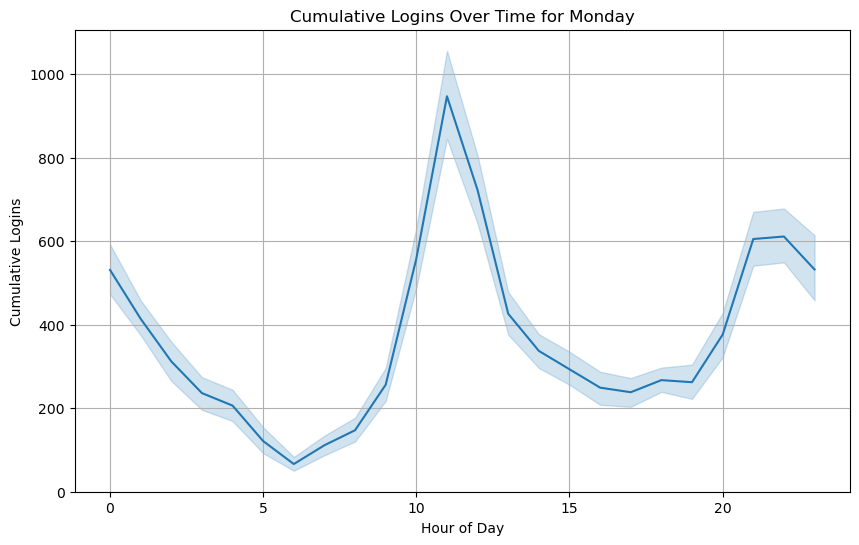

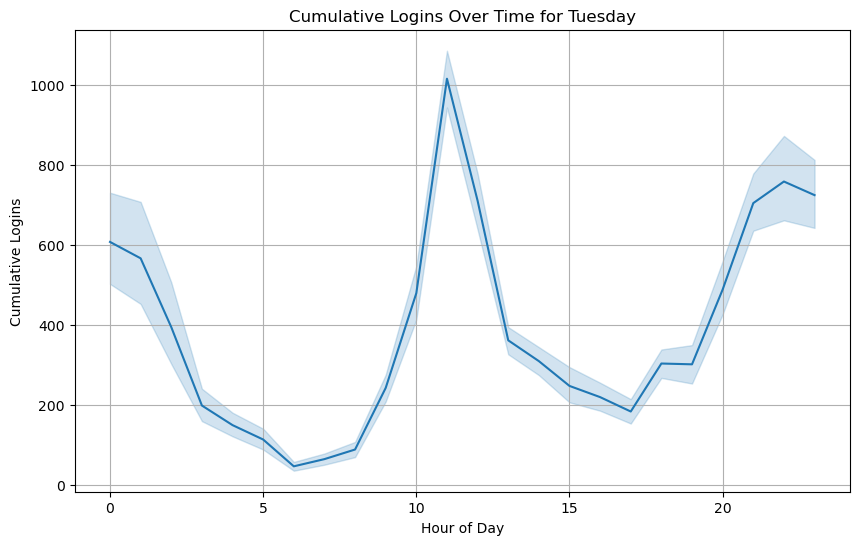

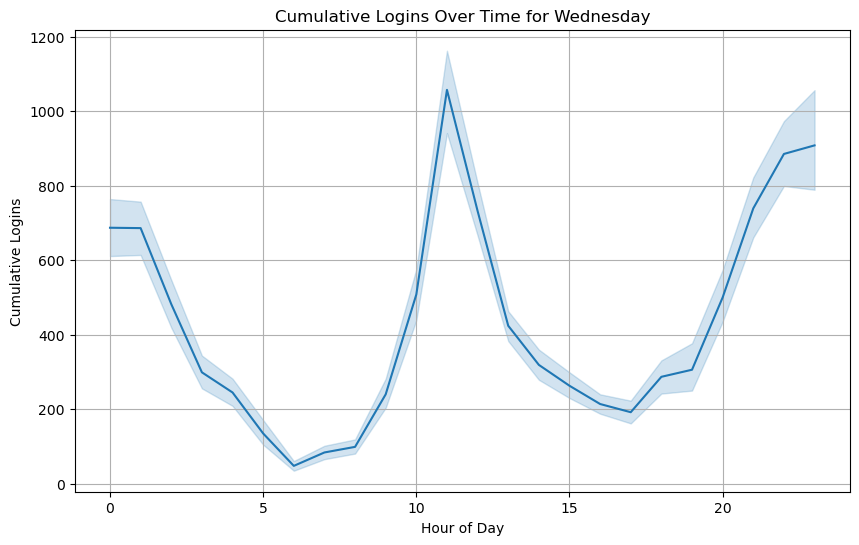

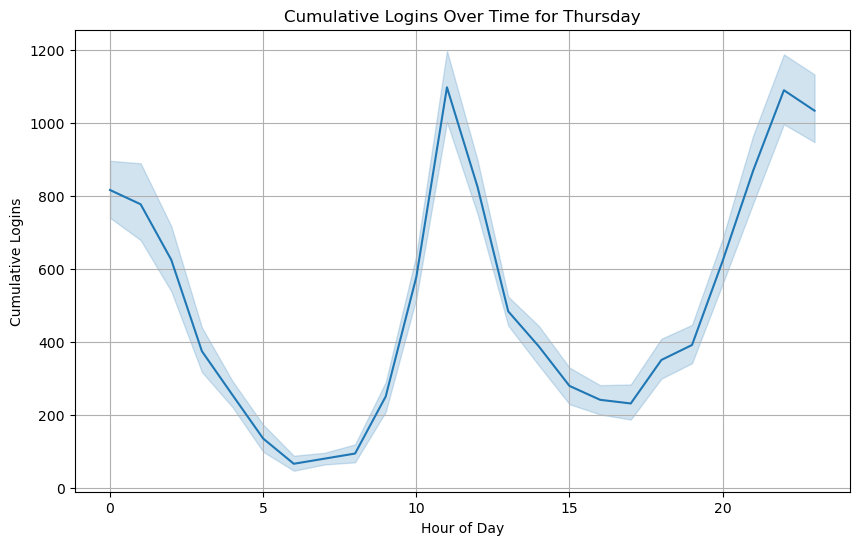

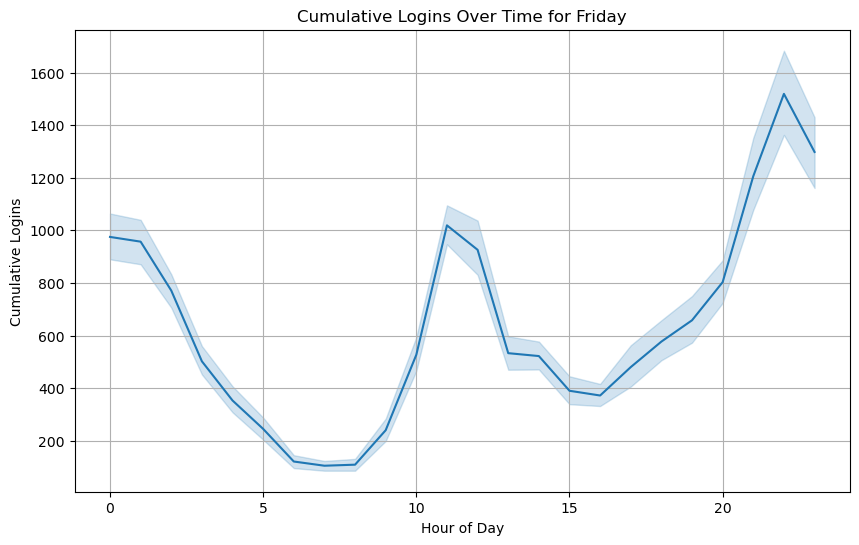

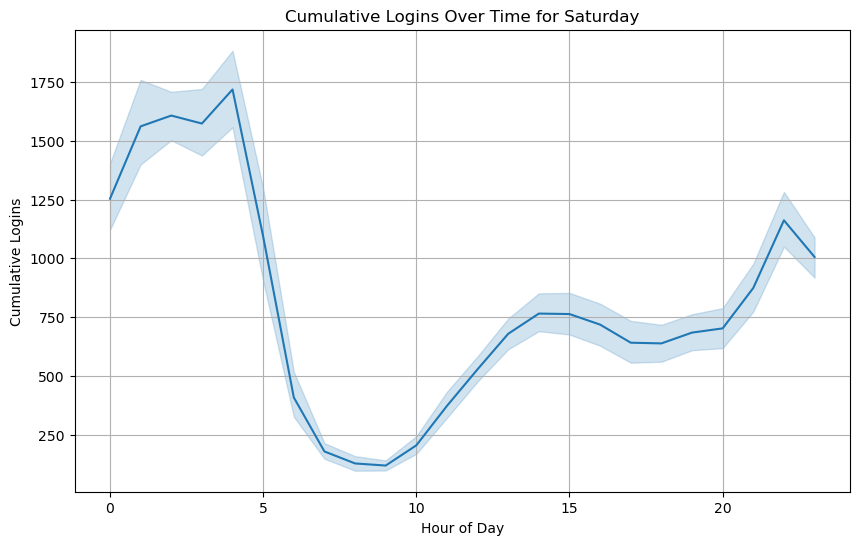

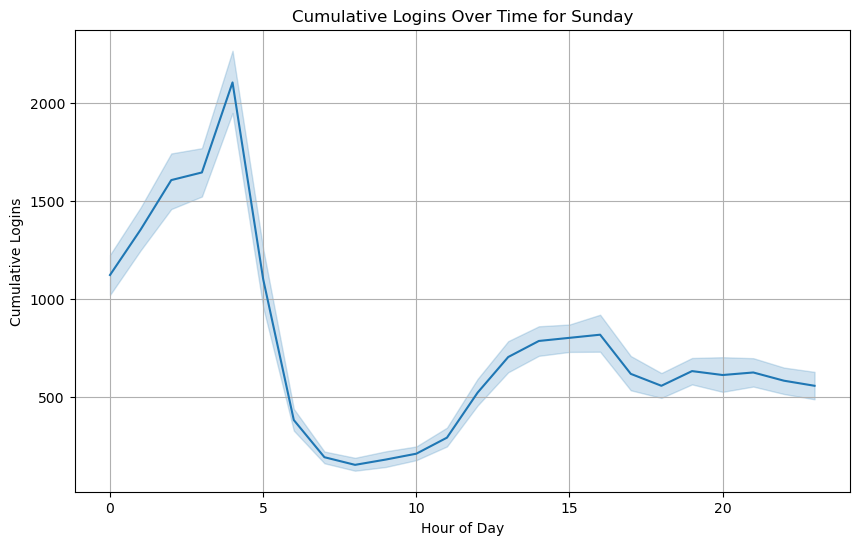

In [180]:
# Create separate plots for each day of the week
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in range(7):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='hour', y='count', data=df[df['day_of_week'] == i], estimator='sum')
    plt.title('Cumulative Logins Over Time for ' + day_of_week[i])
    plt.xlabel('Hour of Day')
    plt.ylabel('Cumulative Logins')
    plt.grid(True)
    plt.show()